In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

try:
    df = pd.read_csv('movies.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('movies.csv', encoding='latin-1')  
    except UnicodeDecodeError:
        df = pd.read_csv('movies.csv', encoding='utf-8', errors='replace')  

# a. 10 películas con mayor presupuesto

In [118]:
top_budget_movies = df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)
top_budget_movies

,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
4953,Justice League,300000000
607,Superman Returns,270000000
3791,Tangled,260000000
7134,The Lion King,260000000
280,Spider-Man 3,258000000


# c. Película con más votos

In [119]:
most_voted_movie = df[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)
most_voted_movie

,title,voteCount
3511,Inception,30788


# e. Películas por año

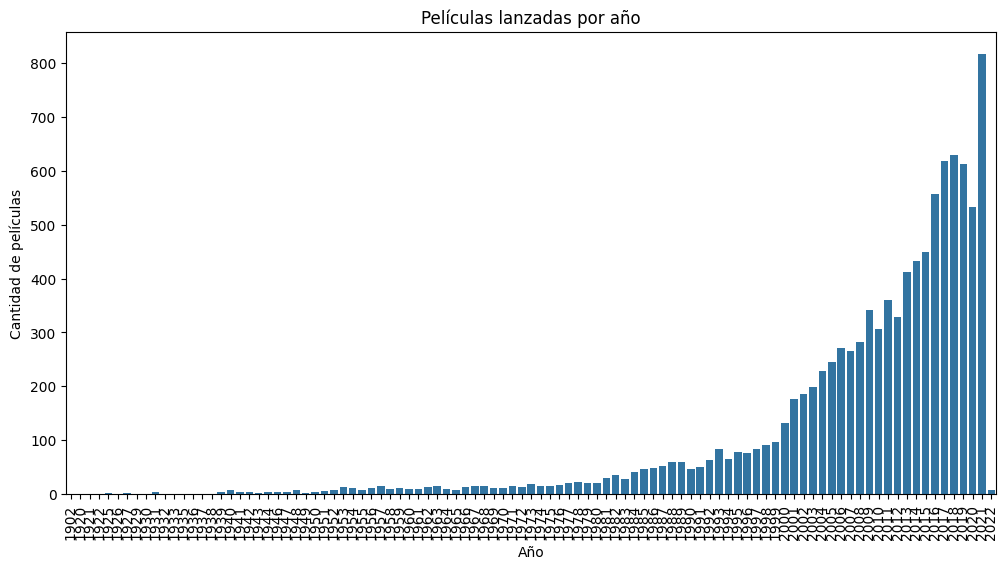

In [120]:
df['release_year'] = pd.to_datetime(df['releaseDate']).dt.year
peliculas_por_ano = df['release_year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=peliculas_por_ano.index, y=peliculas_por_ano.values)
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Películas lanzadas por año')
plt.show()

# g. Género con mayores ganancias

In [121]:
df['profit'] = df['revenue'] - df['budget']
genre_profits = df.groupby('genres')['profit'].mean().sort_values(ascending=False)
genre_profits

genres
Family|Fantasy|Romance                             1.103521e+09
Action|Animation|Comedy|Family|Adventure           9.515526e+08
Family|Adventure|Animation|Comedy|Fantasy|Drama    8.983946e+08
Family|Adventure|Drama|Fantasy                     7.915506e+08
Science Fiction|Adventure|Family|Fantasy           7.824655e+08
                                                       ...     
Adventure|Family|Action|Fantasy                   -9.000000e+07
Adventure|Fantasy|Science Fiction|Family|Action   -1.250000e+08
Family|Adventure|Animation|Action|Fantasy         -1.500000e+08
Action|Thriller|Comedy                            -1.500000e+08
Horror|History|Drama|Thriller                     -1.500000e+08
Name: profit, Length: 2345, dtype: float64

# i. Influencia del reparto en popularidad e ingresos

In [122]:
numeric_columns = ['castMenAmount', 'castWomenAmount', 'popularity', 'revenue']
df_clean = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if necessary
df_clean = df_clean.dropna()

# Compute correlation matrix
correlation_matrix = df_clean.corr()
print(correlation_matrix)

                 castMenAmount  castWomenAmount  popularity   revenue
castMenAmount         1.000000        -0.090474    0.002779 -0.060143
castWomenAmount      -0.090474         1.000000    0.038939  0.290070
popularity            0.002779         0.038939    1.000000  0.162495
revenue              -0.060143         0.290070    0.162495  1.000000


# k. Correlación entre presupuesto e ingresos

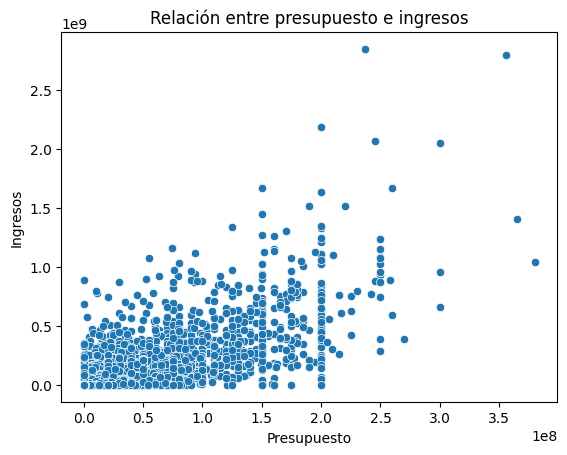

In [123]:
sns.scatterplot(data=df, x='budget', y='revenue')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.title('Relación entre presupuesto e ingresos')
plt.show()

In [124]:
correlation = df[['budget', 'revenue']].corr()
correlation

,budget,revenue
budget,1.000000,0.757454
revenue,0.757454,1.000000


# m. Meses con mejores ingresos

In [125]:
df['release_month'] = pd.to_datetime(df['releaseDate']).dt.month
monthly_revenue = df.groupby('release_month')['revenue'].mean()
monthly_revenue

release_month
1     3.377369e+07
2     4.290835e+07
3     5.111594e+07
4     5.259565e+07
5     8.784544e+07
6     9.474711e+07
7     7.602870e+07
8     3.597008e+07
9     3.192892e+07
10    3.898733e+07
11    7.149211e+07
12    7.435888e+07
Name: revenue, dtype: float64

## Promedio de películas por mes

In [126]:
movies_per_month = df['release_month'].value_counts().mean()
movies_per_month

np.float64(833.3333333333334)